<a href="https://colab.research.google.com/github/Kolanda2014/Kolanda2014/blob/main/SocialMediaSMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# prompt: Load the data into Python, handle missing values and data types

import pandas as pd

# Load the dataset
# Update the file path to the correct location of your file in Colab
df = pd.read_csv('/bin/Mahesh/Spam_SMS.csv')

# Handle missing values (example: fill with mean for numerical columns)
# Only attempt to fill NaN if there are numerical columns with NaNs
if df.select_dtypes(include='number').isnull().any().any():
    df.fillna(df.mean(numeric_only=True), inplace=True)

# Handle missing values (example: fill with mode for categorical columns)
for col in df.select_dtypes(include='object').columns:
    # Check if there are missing values in the column before filling
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Convert data types (example: convert object to category for better memory usage)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Display info about the cleaned dataframe
df.info()
print("\nMissing values after handling:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Class    5574 non-null   category
 1   Message  5574 non-null   category
dtypes: category(2)
memory usage: 185.9 KB

Missing values after handling:
Class      0
Message    0
dtype: int64



--- Word Counts ---
Total number of words: 86908
Number of unique words: 15729

--- Most Frequent Terms ---
Top 20 most common words:
to: 2145
you: 1626
I: 1469
a: 1337
the: 1207
and: 858
in: 800
is: 788
i: 748
u: 698
for: 650
my: 630
of: 592
me: 561
your: 561
on: 488
have: 477
2: 457
that: 422
it: 397


/tmp/ipython-input-49-2279979363.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


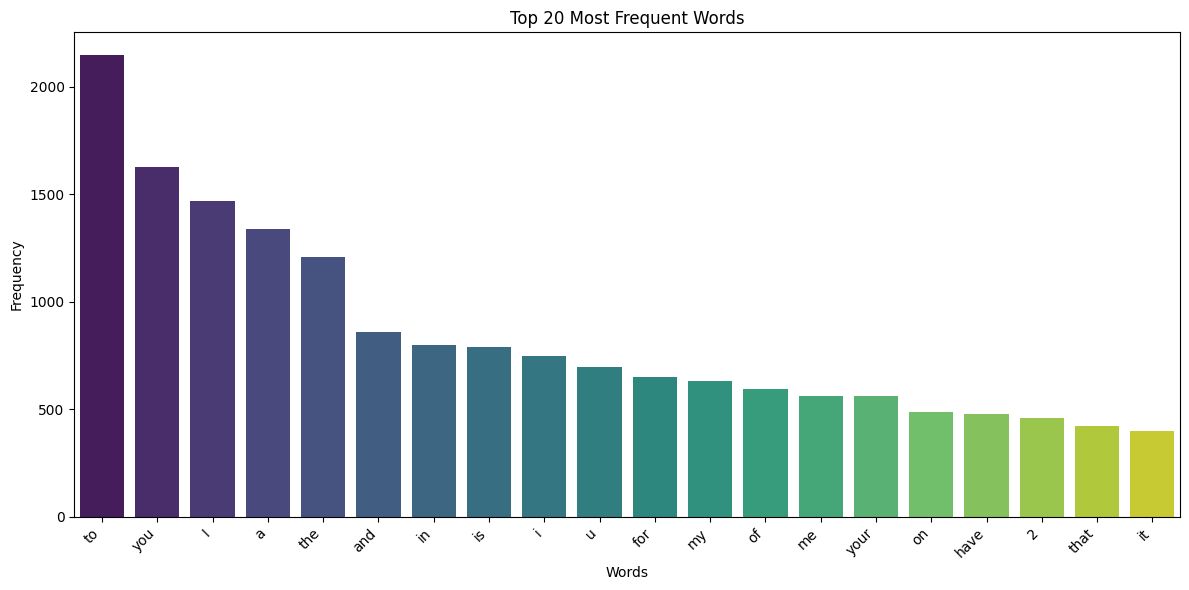


--- Distribution of Document Lengths ---
Average document length: 15.59
Maximum document length: 171
Minimum document length: 1


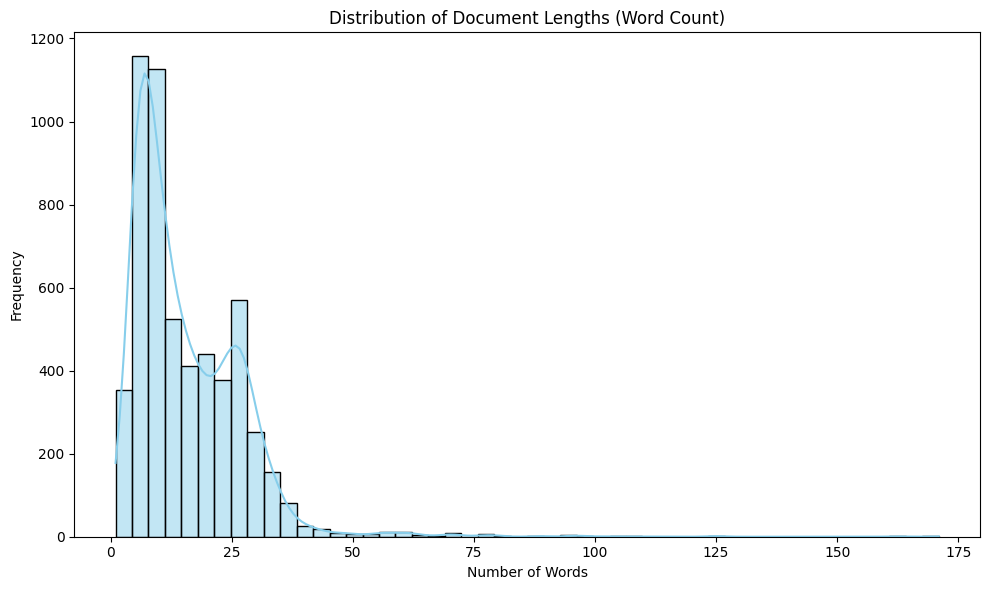

In [49]:
# prompt: Perform exploratory analyses for word counts, most frequent terms and distribution of document lengths

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the relevant text column is named 'message'
text_column = 'Message'

# Check if the specified text column exists
if text_column not in df.columns:
    print(f"Error: Text column '{text_column}' not found in the dataframe.")
else:
    # Word Counts
    print("\n--- Word Counts ---")
    # Concatenate all messages into a single string and split into words
    all_words = ' '.join(df[text_column].astype(str)).split()
    word_counts = Counter(all_words)
    print(f"Total number of words: {len(all_words)}")
    print(f"Number of unique words: {len(word_counts)}")

    # Most Frequent Terms
    print("\n--- Most Frequent Terms ---")
    most_common_words = word_counts.most_common(20)  # Get top 20 most common words
    print("Top 20 most common words:")
    for word, count in most_common_words:
        print(f"{word}: {count}")

    # Visualize Most Frequent Terms
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Distribution of Document Lengths
    print("\n--- Distribution of Document Lengths ---")
    # Calculate the length of each message (number of words)
    df['message_length'] = df[text_column].astype(str).apply(lambda x: len(x.split()))
    print(f"Average document length: {df['message_length'].mean():.2f}")
    print(f"Maximum document length: {df['message_length'].max()}")
    print(f"Minimum document length: {df['message_length'].min()}")

    # Visualize Document Length Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['message_length'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Document Lengths (Word Count)')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Remove the temporary 'message_length' column if not needed later
    df.drop(columns=['message_length'], inplace=True)



--- Word Cloud ---


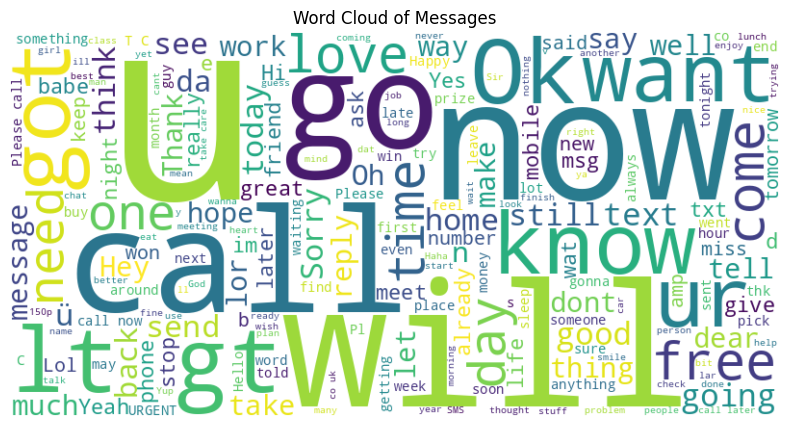


--- Distribution of Character Counts ---
Average character count: 80.45
Maximum character count: 910
Minimum character count: 2


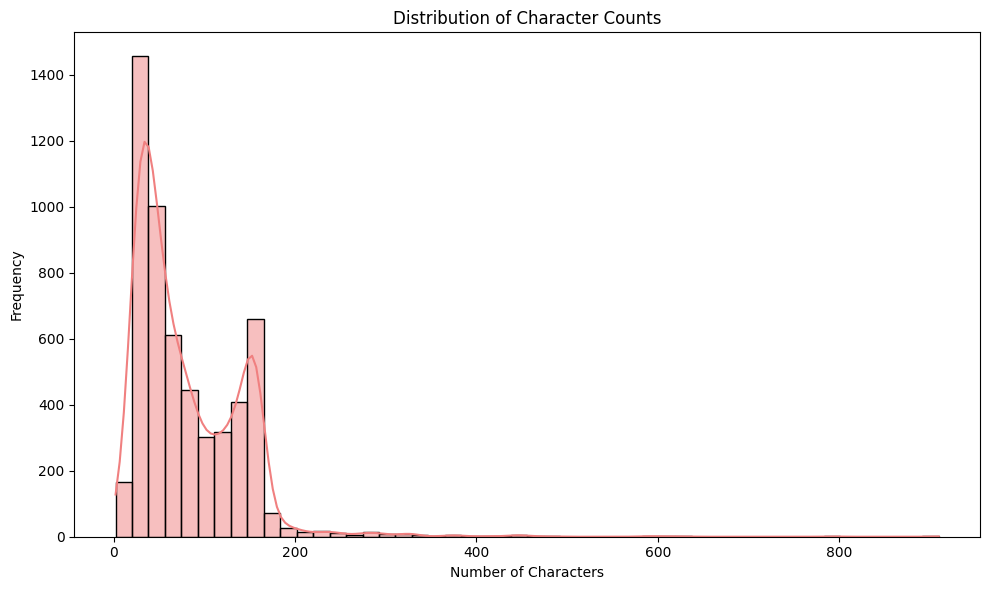

In [50]:
# prompt: Visualize basic text properties like histograms, bar plots, word clouds

import matplotlib.pyplot as plt
# Word Cloud
print("\n--- Word Cloud ---")
from wordcloud import WordCloud

# Join all the words into a single string
text = ' '.join(all_words)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

# Basic Text Properties - Example: Character Count Distribution
print("\n--- Distribution of Character Counts ---")
# Calculate the length of each message (number of characters)
df['char_count'] = df[text_column].astype(str).apply(lambda x: len(x))
print(f"Average character count: {df['char_count'].mean():.2f}")
print(f"Maximum character count: {df['char_count'].max()}")
print(f"Minimum character count: {df['char_count'].min()}")

# Visualize Character Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['char_count'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Character Counts')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Remove the temporary 'char_count' column if not needed later
df.drop(columns=['char_count'], inplace=True)

In [51]:
# Download the missing NLTK resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [52]:
# prompt: Generate Tokenization, lowercasing and removal of stop words

!pip install nltk
import nltk
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Apply tokenization, lowercasing, and stop word removal
df['cleaned_message'] = df[text_column].astype(str).apply(lambda x: word_tokenize(x.lower()))
stop_words = set(stopwords.words('english'))
df['cleaned_message'] = df['cleaned_message'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the first few rows with the new cleaned message column
print("\n--- Messages after Tokenization, Lowercasing, and Stop Word Removal ---")
print(df[[text_column, 'cleaned_message']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Messages after Tokenization, Lowercasing, and Stop Word Removal ---
                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  [go, jurong, point, ,, crazy, .., available, b...  
1           [ok, lar, ..., joking, wif, u, oni, ...]  
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...  
3  [u, dun, say, early, hor, ..., u, c, already, ...  
4  [nah, n't, think, goes, usf, ,, lives, around,...  


In [53]:
# prompt: Implement Stemming and lemmatization

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data for lemmatization and POS tagging
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function for stemming
def apply_stemming(tokens):
  return [stemmer.stem(word) for word in tokens]

# Function for lemmatization
# Define a function to get the appropriate part-of-speech tag for lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return nltk.corpus.wordnet.ADV # Using ADJ tag for simplicity if needed
    elif tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN # Default to noun

def apply_lemmatization(tokens):
  # Tag words with part-of-speech
  tagged_tokens = nltk.pos_tag(tokens)
  lemmatized_tokens = []
  for word, tag in tagged_tokens:
      wntag = get_wordnet_pos(tag)
      lemmatized_tokens.append(lemmatizer.lemmatize(word, wntag))
  return lemmatized_tokens

# Apply stemming to the cleaned messages
df['stemmed_message'] = df['cleaned_message'].apply(apply_stemming)

# Apply lemmatization to the cleaned messages
df['lemmatized_message'] = df['cleaned_message'].apply(apply_lemmatization)

# Display the first few rows with the new stemmed and lemmatized columns
print("\n--- Messages after Stemming and Lemmatization ---")
print(df[[text_column, 'cleaned_message', 'stemmed_message', 'lemmatized_message']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



--- Messages after Stemming and Lemmatization ---
                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  \
0  [go, jurong, point, ,, crazy, .., available, b...   
1           [ok, lar, ..., joking, wif, u, oni, ...]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3  [u, dun, say, early, hor, ..., u, c, already, ...   
4  [nah, n't, think, goes, usf, ,, lives, around,...   

                                     stemmed_message  \
0  [go, jurong, point, ,, crazi, .., avail, bugi,...   
1             [ok, lar, ..., joke, wif, u, oni, ...]   
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...   
3  [u, dun, say, earli, hor, ..., u, c, alreadi, ..

In [54]:
# prompt: Handling of emojis, URLs, punctuation, and numbers

import re

def clean_text(text):
    # Convert to string to handle potential non-string entries
    text = str(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove emojis (basic pattern, may not cover all emojis)
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase (already done in previous step, but good to keep in mind)
    text = text.lower()
    return text

# Apply the cleaning function to the relevant text column
# We apply it before tokenization for better results
df['cleaned_text_initial'] = df[text_column].apply(clean_text)

# Now, update the tokenization step to use this new column
# Apply tokenization, lowercasing, and stop word removal to the *initially cleaned* text
df['cleaned_message'] = df['cleaned_text_initial'].apply(lambda x: word_tokenize(x)) # Lowercasing is now part of clean_text
stop_words = set(stopwords.words('english'))
df['cleaned_message'] = df['cleaned_message'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the first few rows with the new cleaned message column
print("\n--- Messages after Initial Cleaning, Tokenization, and Stop Word Removal ---")
print(df[[text_column, 'cleaned_text_initial', 'cleaned_message']].head())

# Now you can proceed with stemming and lemmatization on 'cleaned_message' as before
# Apply stemming to the cleaned messages
df['stemmed_message'] = df['cleaned_message'].apply(apply_stemming)

# Apply lemmatization to the cleaned messages
df['lemmatized_message'] = df['cleaned_message'].apply(apply_lemmatization)

# Display the first few rows with the new stemmed and lemmatized columns
print("\n--- Messages after Stemming and Lemmatization (on cleaned text) ---")
print(df[[text_column, 'cleaned_message', 'stemmed_message', 'lemmatized_message']].head())


--- Messages after Initial Cleaning, Tokenization, and Stop Word Removal ---
                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                cleaned_text_initial  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in  a wkly comp to win fa cup final...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                     cleaned_message  
0  [go, jurong, point, crazy, available, bugis, n...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, wkly, comp, win, fa, cup, final,...  
3      [u, dun, say, early, 

In [55]:
# prompt: Generate Bag-of-Words  and TF-IDF vectors

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Use the lemmatized messages for vectorization as they are typically preferred
vectorization_column = 'lemmatized_message'

# Ensure the column exists and is in the correct format (list of strings/tokens)
# We need to join the tokens back into a string for the vectorizers
df['lemmatized_message_str'] = df[vectorization_column].apply(lambda x: ' '.join(x))


# --- Bag-of-Words (BoW) ---
print("\n--- Generating Bag-of-Words Vectors ---")

# Initialize CountVectorizer
# min_df: Ignore terms that appear in less than min_df documents
# max_df: Ignore terms that appear in more than max_df proportion of documents
# max_features: Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
count_vectorizer = CountVectorizer(min_df=1, max_df=0.95)

# Fit and transform the data
# The fit method learns the vocabulary from the corpus.
# The transform method converts the text documents into feature vectors.
X_bow = count_vectorizer.fit_transform(df['lemmatized_message_str'])

print(f"Shape of BoW matrix: {X_bow.shape}")
# The shape is (number of documents, size of vocabulary)

# You can optionally look at the vocabulary
# print("\nBoW Vocabulary (first 20):")
# print(list(count_vectorizer.vocabulary_.keys())[:20])

# You can convert the sparse matrix to a dense array to view it (be cautious with large datasets)
# X_bow_dense = X_bow.toarray()
# print("\nFirst 5 BoW vectors:")
# print(X_bow_dense[:5])


# --- TF-IDF (Term Frequency-Inverse Document Frequency) ---
print("\n--- Generating TF-IDF Vectors ---")

# Initialize TfidfVectorizer
# min_df, max_df, max_features work similarly to CountVectorizer
# smooth_idf: Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions for unseen terms.
# use_idf: Enable inverse-document-frequency reweighting.
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=0.95, smooth_idf=True, use_idf=True)

# Fit and transform the data
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_message_str'])

print(f"Shape of TF-IDF matrix: {X_tfidf.shape}")
# The shape is the same as BoW matrix (number of documents, size of vocabulary)

# You can optionally look at the vocabulary and inverse document frequencies
# print("\nTF-IDF Vocabulary (first 20):")
# print(list(tfidf_vectorizer.vocabulary_.keys())[:20])

# print("\nTF-IDF Inverse Document Frequencies (first 20):")
# print(list(tfidf_vectorizer.idf_)[:20])


# You can convert the sparse matrix to a dense array to view it (be cautious with large datasets)
# X_tfidf_dense = X_tfidf.toarray()
# print("\nFirst 5 TF-IDF vectors:")
# print(X_tfidf_dense[:5])


# You now have the BoW vectors in X_bow and TF-IDF vectors in X_tfidf.
# These can be used as features for machine learning models.



--- Generating Bag-of-Words Vectors ---
Shape of BoW matrix: (5574, 7511)

--- Generating TF-IDF Vectors ---
Shape of TF-IDF matrix: (5574, 7511)


In [56]:
# prompt: Generate Word embeddings and document embeddings

!pip install transformers
!pip install sentence-transformers

from transformers import AutoModel, AutoTokenizer
from sentence_transformers import SentenceTransformer

print("\n--- Generating Word Embeddings (Example: BERT-based) ---")

# Load a pre-trained model and tokenizer
# Using a smaller, faster model for demonstration
model_name_word = "bert-base-uncased" # Or 'roberta-base', 'distilbert-base-uncased', etc.
tokenizer_word = AutoTokenizer.from_pretrained(model_name_word)
model_word = AutoModel.from_pretrained(model_name_word)

# Function to generate word embeddings for a list of tokens (a document)
def get_word_embeddings(tokens):
    # Join tokens into a single string for the tokenizer
    text = ' '.join(tokens)
    # Tokenize and get model outputs
    # return_tensors='pt' returns PyTorch tensors. Change to 'tf' for TensorFlow.
    inputs = tokenizer_word(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model_word(**inputs)
    # The output 'last_hidden_state' contains embeddings for each token
    # We'll take the embeddings for the actual words (excluding [CLS], [SEP], padding tokens)
    # and often average them or take the first token embedding.
    # For simplicity, we'll return the full output tensor here.
    # You would typically process this to get specific word embeddings.
    # For example, to get the embedding for the first token (often [CLS] or the first word):
    # return outputs.last_hidden_state[:, 0, :].detach().numpy() # For document embedding
    # To get embeddings for all tokens:
    # return outputs.last_hidden_state[0].detach().numpy() # Shape (num_tokens, embedding_dim)
    # Note: This requires careful handling of token-word alignment and batch processing for efficiency.

    # For this example, let's demonstrate getting embeddings for the *first* document
    # You would typically process all documents in batches
    if len(tokens) > 0:
        # Take the first document's cleaned tokens
        tokens_str = ' '.join(tokens)
        # Get input IDs
        input_ids = tokenizer_word.encode(tokens_str, return_tensors='pt', truncation=True, padding='max_length', max_length=128) # Example max_length
        # Get embeddings
        with torch.no_grad(): # No need to calculate gradients for just getting embeddings
            outputs = model_word(input_ids)
        # The output is a tuple, the first element is the last hidden state
        # Shape: (batch_size, sequence_length, hidden_size)
        word_embeddings = outputs.last_hidden_state
        # In this case, batch_size is 1. Shape is (1, sequence_length, hidden_size)
        # You get embeddings for [CLS], tokens, [SEP], and padding
        return word_embeddings[0] # Return embeddings for the first (and only) document
    else:
        return None


# Example: Get word embeddings for the first few cleaned messages
import torch # Import torch if using PyTorch tensors

# Check if a GPU is available and use it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_word.to(device)

# It's computationally expensive to get word embeddings for each token of every document individually.
# This example will only get embeddings for the first document for demonstration.
# For a real application, you would process documents in batches.

# Ensure 'lemmatized_message' is not empty
if not df['lemmatized_message'].empty and len(df['lemmatized_message'].iloc[0]) > 0:
    first_doc_tokens = df['lemmatized_message'].iloc[0]
    print(f"\nTokens for the first document: {first_doc_tokens}")
    # Get word embeddings for the first document's tokens
    # Ensure the tokens are joined into a string for the tokenizer
    first_doc_text = ' '.join(first_doc_tokens)

    # Tokenize and get input IDs, paying attention to max length
    # Truncation and padding are important for BERT models
    inputs = tokenizer_word(first_doc_text, return_tensors='pt', truncation=True, padding='max_length', max_length=128).to(device) # Move to device

    # Get model outputs
    with torch.no_grad():
        outputs = model_word(**inputs)

    # Get the last hidden state
    # Shape: (batch_size, sequence_length, hidden_size)
    first_doc_word_embeddings = outputs.last_hidden_state[0] # Get the first document's embeddings

    print(f"Word embeddings for the first document shape: {first_doc_word_embeddings.shape}")
    # The shape is (sequence_length, embedding_dimension)
    # The sequence length includes [CLS] token, word tokens, [SEP] token, and padding tokens.
    # The embedding dimension is the size of the hidden state of the BERT model (e.g., 768 for bert-base-uncased)

    # You can access the embedding for a specific token (e.g., the first actual word after [CLS])
    # Find the index of the first actual token after [CLS]
    # The token IDs for the actual words start after the [CLS] token (usually index 0)
    # and before the [SEP] token. The exact index depends on the tokenization.
    # For simplicity, let's look at the embedding of the token at index 1 (often the first word)
    if first_doc_word_embeddings.shape[0] > 1:
        embedding_of_first_word = first_doc_word_embeddings[1]
        print(f"\nEmbedding for the first actual word token shape: {embedding_of_first_word.shape}")
        # This is the vector representation of that word in context.
    else:
        print("\nSequence too short to get embedding for a specific word token.")


else:
    print("\nNo data in the first document's 'lemmatized_message' to generate word embeddings.")


print("\n--- Generating Document Embeddings (Example: Sentence-BERT) ---")

# Load a pre-trained Sentence-BERT model
# These models are specifically fine-tuned to produce meaningful sentence embeddings.
# Using a common general-purpose model
model_name_doc = "all-MiniLM-L6-v2" # Or 'all-mpnet-base-v2', ' paraphrase-MiniLM-L3-v2', etc.
sentence_model = SentenceTransformer(model_name_doc)

# Generate document embeddings for all documents
# Sentence-BERT takes a list of strings
documents_to_embed = df['lemmatized_message_str'].tolist()

# Handle cases where the list might be empty or contain empty strings
if documents_to_embed:
    print(f"\nGenerating embeddings for {len(documents_to_embed)} documents...")
    # Encode the documents
    document_embeddings = sentence_model.encode(documents_to_embed, show_progress_bar=True)

    print(f"Shape of document embeddings matrix: {document_embeddings.shape}")
    # The shape is (number of documents, embedding_dimension)
    # The embedding dimension depends on the specific Sentence-BERT model used (e.g., 384 for all-MiniLM-L6-v2)

    print("\nFirst 5 document embeddings (first 10 dimensions):")
    print(document_embeddings[:5, :10])

    # You can store these embeddings back in the dataframe
    # Be cautious with very large datasets as embeddings can be memory intensive
    # df['document_embedding'] = list(document_embeddings)
    # print("\nDataFrame with document embeddings:")
    # print(df.head())

else:
    print("\nNo documents available to generate document embeddings.")

# You now have word embeddings (demonstrated for the first document) and document embeddings for all documents.
# These can be used for various downstream tasks like similarity calculations, clustering, or as features for machine learning.


--- Generating Word Embeddings (Example: BERT-based) ---

Tokens for the first document: ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
Word embeddings for the first document shape: torch.Size([128, 768])

Embedding for the first actual word token shape: torch.Size([768])

--- Generating Document Embeddings (Example: Sentence-BERT) ---

Generating embeddings for 5574 documents...


Batches:   0%|          | 0/175 [00:00<?, ?it/s]

Shape of document embeddings matrix: (5574, 384)

First 5 document embeddings (first 10 dimensions):
[[-0.05016921 -0.0231038   0.07149208 -0.04216202 -0.10899195  0.03082177
   0.12125411 -0.01945499  0.08496284 -0.06839731]
 [-0.03568893 -0.073488    0.03983088 -0.05569983 -0.00437956 -0.04488302
   0.0914541   0.04586075  0.02011345  0.03681247]
 [-0.04045098  0.02827057 -0.00561004 -0.05603704  0.07558449  0.09351324
   0.06802944  0.09581928  0.00414351  0.01096358]
 [-0.01678541  0.04244423  0.00509614 -0.01336117  0.00550857  0.04438113
   0.06719626  0.02066479  0.07125676  0.01940176]
 [-0.02657142 -0.12456033 -0.03700954 -0.02983094  0.02686138 -0.01790252
   0.0768732  -0.05486937 -0.03391043  0.02752733]]


In [57]:
# prompt: Compare representations in terms of sparsity and semantic coherence

# --- Comparing Representations ---

print("\n--- Comparison of Text Representations ---")

# 1. Sparsity: How many zero values are there in the vectors?
#    BoW and TF-IDF are typically sparse, especially with large vocabularies.
#    Word Embeddings and Document Embeddings from transformer models are dense.

print("\nSparsity Analysis:")

if 'X_bow' in locals():
    # Count non-zero elements in the sparse matrix
    bow_non_zeros = X_bow.nnz
    bow_total_elements = X_bow.shape[0] * X_bow.shape[1]
    bow_sparsity = 1 - (bow_non_zeros / bow_total_elements)
    print(f"BoW Matrix Sparsity: {bow_sparsity:.4f}")

if 'X_tfidf' in locals():
    # Count non-zero elements in the sparse matrix
    tfidf_non_zeros = X_tfidf.nnz
    tfidf_total_elements = X_tfidf.shape[0] * X_tfidf.shape[1]
    tfidf_sparsity = 1 - (tfidf_non_zeros / tfidf_total_elements)
    print(f"TF-IDF Matrix Sparsity: {tfidf_sparsity:.4f}")

if 'document_embeddings' in locals():
    # Dense vectors have very low or zero sparsity in practice for most models
    # (unless specifically designed to be sparse).
    # We can check for near-zero values if needed, but generally they are dense.
    # A simple check for sparsity would involve counting actual zeros, but
    # for standard transformer embeddings, they are expected to be dense.
    print("Document Embeddings (Sentence-BERT): Dense representation (Sparsity is low).")

if 'first_doc_word_embeddings' in locals() and first_doc_word_embeddings is not None:
     print(f"Word Embeddings (BERT-based): Dense representation (Sparsity is low).")


# 2. Semantic Coherence: How well do the representations capture the meaning and relationships between words and documents?

print("\nSemantic Coherence Analysis:")

print("Bag-of-Words (BoW):")
print("- Represents documents based on word frequencies. Ignores word order and context.")
print("- Captures *what* words are present, but not the nuances of their meaning or relationships.")
print("- Limited semantic coherence; 'king' and 'queen' are just different features.")

print("\nTF-IDF:")
print("- Extends BoW by weighting terms based on their importance across the corpus.")
print("- Helps in identifying distinguishing terms for a document.")
print("- Still largely ignores word order and deep semantic relationships.")
print("- Better than BoW for identifying important keywords, but limited semantic coherence.")

print("\nWord Embeddings (BERT-based):")
print("- Represents individual words as dense vectors in a high-dimensional space.")
print("- Learned from large corpora, capturing contextual meaning.")
print("- Words with similar meanings or used in similar contexts tend to have closer vectors.")
print("- High semantic coherence at the word level, capturing relationships like 'king' - 'man' + 'woman' ~ 'queen'.")
print("- Contextual embeddings (like BERT) are even better, providing different vectors for a word based on its usage.")

print("\nDocument Embeddings (Sentence-BERT):")
print("- Represents entire documents/sentences as single dense vectors.")
print("- Specifically trained to produce embeddings where semantically similar texts have closer vectors.")
print("- Captures the overall meaning and topic of the document.")
print("- High semantic coherence at the document level, allowing for tasks like similarity search and clustering.")

# 3. Dimensionality: The size of the resulting vector space.

print("\nDimensionality:")

if 'X_bow' in locals():
    print(f"BoW Dimensionality (Vocabulary Size): {X_bow.shape[1]}")
if 'X_tfidf' in locals():
    print(f"TF-IDF Dimensionality (Vocabulary Size): {X_tfidf.shape[1]}")
if 'document_embeddings' in locals():
    print(f"Document Embeddings Dimensionality: {document_embeddings.shape[1]}")
if 'first_doc_word_embeddings' in locals() and first_doc_word_embeddings is not None:
     print(f"Word Embeddings Dimensionality (BERT-based): {first_doc_word_embeddings.shape[1]} (per token)")


# 4. Trade-offs

print("\nKey Trade-offs:")

print("BoW/TF-IDF:")
print("- Pros: Simple, interpretable (features correspond to words), relatively fast to compute for smaller datasets.")
print("- Cons: High sparsity, ignore context and word order, limited semantic coherence, vocabulary explosion with large datasets.")

print("\nWord/Document Embeddings (Transformer-based):")
print("- Pros: Capture rich semantic relationships and context (especially contextual embeddings), lower dimensionality (dense vectors), better performance on downstream tasks requiring semantic understanding.")
print("- Cons: Less interpretable (dimensions don't map directly to words), computationally more expensive to generate, require large models and potentially GPUs.")

print("\nConclusion:")
print("For tasks requiring understanding of meaning, context, and semantic relationships (like similarity, classification where nuance matters), word and document embeddings from models like BERT/Sentence-BERT are generally superior due to their high semantic coherence and dense representation.")
print("BoW and TF-IDF are simpler alternatives suitable for tasks where word presence/frequency is sufficient and computational efficiency is critical, but they suffer from high sparsity and limited semantic understanding.")



--- Comparison of Text Representations ---

Sparsity Analysis:
BoW Matrix Sparsity: 0.9989
TF-IDF Matrix Sparsity: 0.9989
Document Embeddings (Sentence-BERT): Dense representation (Sparsity is low).
Word Embeddings (BERT-based): Dense representation (Sparsity is low).

Semantic Coherence Analysis:
Bag-of-Words (BoW):
- Represents documents based on word frequencies. Ignores word order and context.
- Captures *what* words are present, but not the nuances of their meaning or relationships.
- Limited semantic coherence; 'king' and 'queen' are just different features.

TF-IDF:
- Extends BoW by weighting terms based on their importance across the corpus.
- Helps in identifying distinguishing terms for a document.
- Still largely ignores word order and deep semantic relationships.
- Better than BoW for identifying important keywords, but limited semantic coherence.

Word Embeddings (BERT-based):
- Represents individual words as dense vectors in a high-dimensional space.
- Learned from large


--- Training Random Forest Classifier ---
Training data shape: (4180, 7511)
Testing data shape: (1394, 7511)
Model training complete.

--- Model Evaluation ---
Accuracy: 0.9763

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1207
        spam       1.00      0.82      0.90       187

    accuracy                           0.98      1394
   macro avg       0.99      0.91      0.94      1394
weighted avg       0.98      0.98      0.98      1394


Confusion Matrix:
[[1207    0]
 [  33  154]]


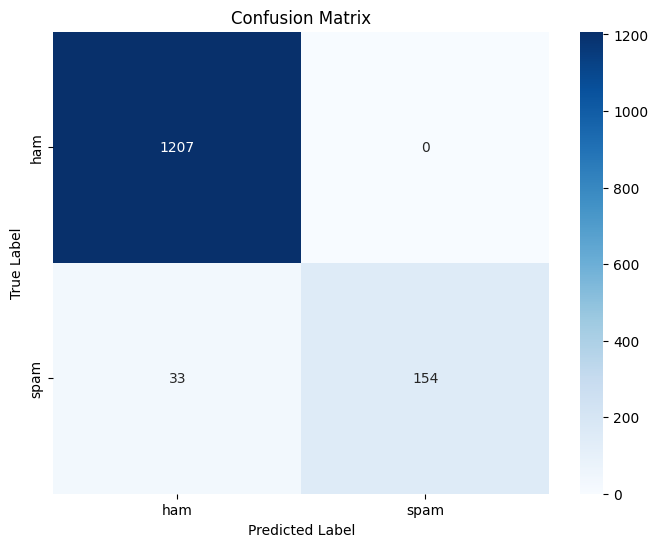

In [58]:
# prompt: Generate sentiment Classification using train a supervised model random forest to predict sentiment labels

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Category' is the target variable and 'lemmatized_message_str' is the feature
# Make sure your target variable 'Category' exists and is suitable for classification
if 'Class' not in df.columns:
    print("Error: 'Category' column not found. Please specify the target variable.")
else:
    # Define features (X) and target (y)
    # Using TF-IDF vectors as features for this example
    X = X_tfidf
    y = df['Class'] # Assuming 'Category' contains your sentiment labels (e.g., 'ham', 'spam')

    # Split the dataset into training and testing sets
    # stratify=y ensures that the proportion of the target variable is the same in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    print("\n--- Training Random Forest Classifier ---")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # Initialize the Random Forest Classifier
    # n_estimators: the number of trees in the forest
    # random_state: for reproducibility
    # class_weight: handles imbalanced datasets (optional, but often useful)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # 'balanced' adjusts weights inversely proportional to class frequencies

    # Train the model
    rf_model.fit(X_train, y_train)

    print("Model training complete.")

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    print("\n--- Model Evaluation ---")

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("\nClassification Report:")
    # target_names allows you to specify the names of your classes
    print(classification_report(y_test, y_pred, target_names=y.unique()))

    # Print confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # You can now use the trained 'rf_model' to predict sentiment on new data.
    # Remember to preprocess new text data in the same way (cleaning, tokenization, lemmatization)
    # and then transform it using the *same* fitted TF-IDF vectorizer (`tfidf_vectorizer.transform(new_text_data)`)
    # before making predictions.

    # Example of making a prediction on a new piece of text:
    # new_text = ["Congratulations! You've won a prize! Claim now."]
    # Preprocess the new text (cleaning, tokenization, lemmatization)
    # cleaned_new_text = [' '.join(apply_lemmatization(apply_stemming([word for word in word_tokenize(clean_text(text).lower()) if word not in stop_words]))) for text in new_text]
    # Transform using the fitted vectorizer
    # new_text_tfidf = tfidf_vectorizer.transform(cleaned_new_text)
    # Predict
    # prediction = rf_model.predict(new_text_tfidf)
    # print(f"\nPrediction for '{new_text[0]}': {prediction[0]}")



In [59]:
# prompt: Report accuracy, precison, recall and F1-score

# The classification report from the previous code already provides Accuracy, Precision, Recall, and F1-score.
# You can simply print the classification report again.
print("\nFinal Evaluation Metrics:")
print(classification_report(y_test, y_pred, target_names=y.unique()))

# To explicitly extract and print each metric:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')   # Use weighted average for multi-class
f1 = f1_score(y_test, y_pred, average='weighted')       # Use weighted average for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")


Final Evaluation Metrics:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1207
        spam       1.00      0.82      0.90       187

    accuracy                           0.98      1394
   macro avg       0.99      0.91      0.94      1394
weighted avg       0.98      0.98      0.98      1394

Accuracy: 0.9763
Precision (weighted): 0.9770
Recall (weighted): 0.9763
F1-score (weighted): 0.9753


In [60]:
# prompt: Generate Cluster documents using K-means and evaluate cluster purity

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X_tfidf contains your document vectors (e.g., TF-IDF or document embeddings)
# If using document embeddings, replace X_tfidf with document_embeddings
# We'll use X_tfidf for this example as it was successfully generated.
X = X_tfidf

# Ensure X is not empty
if 'X' in locals() and X is not None and X.shape[0] > 0:

    print("\n--- Clustering Documents using K-Means ---")

    # Determine the optimal number of clusters (K)
    # You can use methods like the Elbow Method or Silhouette Score
    # For demonstration, let's assume we want to find 2 clusters (spam and ham)
    # In a real scenario, you might need to experiment with different K values.

    # Let's try clustering into 2 clusters (spam and ham)
    k = 2 # Since the original data has 2 classes

    # Initialize K-Means model
    # n_clusters: The number of clusters to form
    # random_state: For reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init is important

    # Fit the model to the data
    kmeans.fit(X)

    # Get the cluster labels for each document
    cluster_labels = kmeans.labels_

    # Add the cluster labels to the dataframe for analysis
    df['cluster_label'] = cluster_labels

    print(f"Clustering complete. Assigned documents to {k} clusters.")

    # You can now explore the clusters, e.g., print documents from each cluster
    # print("\nFirst 10 documents in Cluster 0:")
    # print(df[df['cluster_label'] == 0]['Message'].head(10).tolist())

    # print("\nFirst 10 documents in Cluster 1:")
    # print(df[df['cluster_label'] == 1]['Message'].head(10).tolist())


    # --- Evaluate Cluster Purity ---
    # Cluster purity measures how homogeneous clusters are with respect to the original labels.
    # A cluster is considered pure if it contains documents predominantly from a single class.
    # To calculate purity, you need the true labels (assuming you have them, like 'Class' in this dataset).

    if 'Class' in df.columns:
        print("\n--- Evaluating Cluster Purity ---")

        # Mapping cluster labels to true labels
        # For each cluster, find the dominant true label
        cluster_mapping = {}
        for cluster_id in range(k):
            # Get the true labels for documents in this cluster
            true_labels_in_cluster = df[df['cluster_label'] == cluster_id]['Class']
            if not true_labels_in_cluster.empty:
                # Count the occurrences of each true label
                label_counts = true_labels_in_cluster.value_counts()
                # The most frequent label is the dominant one for this cluster
                dominant_label = label_counts.index[0]
                cluster_mapping[cluster_id] = dominant_label
                print(f"Cluster {cluster_id} dominant label: {dominant_label}")

        # Calculate purity
        # Purity = (Sum of documents correctly assigned based on dominant label) / (Total number of documents)
        correctly_assigned_count = 0
        for cluster_id, dominant_label in cluster_mapping.items():
            # Count documents in this cluster that have the dominant label
            count_in_cluster = df[(df['cluster_label'] == cluster_id) & (df['Class'] == dominant_label)].shape[0]
            correctly_assigned_count += count_in_cluster

        total_documents = df.shape[0]
        purity = correctly_assigned_count / total_documents

        print(f"\nTotal documents: {total_documents}")
        print(f"Documents correctly assigned based on dominant cluster label: {correctly_assigned_count}")
        print(f"Cluster Purity: {purity:.4f}")

        # Note: Purity is a simple metric. Other metrics like Adjusted Rand Index,
        # Normalized Mutual Information, Silhouette Score (which doesn't require true labels)
        # provide more robust evaluations of clustering quality.

        # Example of Silhouette Score (measures how similar a data point is to its own cluster
        # compared to other clusters. Higher values indicate better-defined clusters.)
        try:
            silhouette_avg = silhouette_score(X, cluster_labels)
            print(f"Silhouette Score: {silhouette_avg:.4f}")
        except ValueError:
             print("Silhouette score calculation failed. This can happen with a single cluster or other issues.")


    else:
        print("\nCannot evaluate cluster purity: 'Class' column (true labels) not found in the dataframe.")

else:
    print("\nClustering aborted: No data available in the feature matrix (X).")



--- Clustering Documents using K-Means ---
Clustering complete. Assigned documents to 2 clusters.

--- Evaluating Cluster Purity ---
Cluster 0 dominant label: ham
Cluster 1 dominant label: spam

Total documents: 5574
Documents correctly assigned based on dominant cluster label: 4942
Cluster Purity: 0.8866
Silhouette Score: 0.0050



--- Visualizing Document Embeddings with t-SNE ---
Using 2000 samples for t-SNE visualization.
Shape of subset embeddings for t-SNE: (2000, 384)
Applying t-SNE... This may take a few minutes.
t-SNE completed.


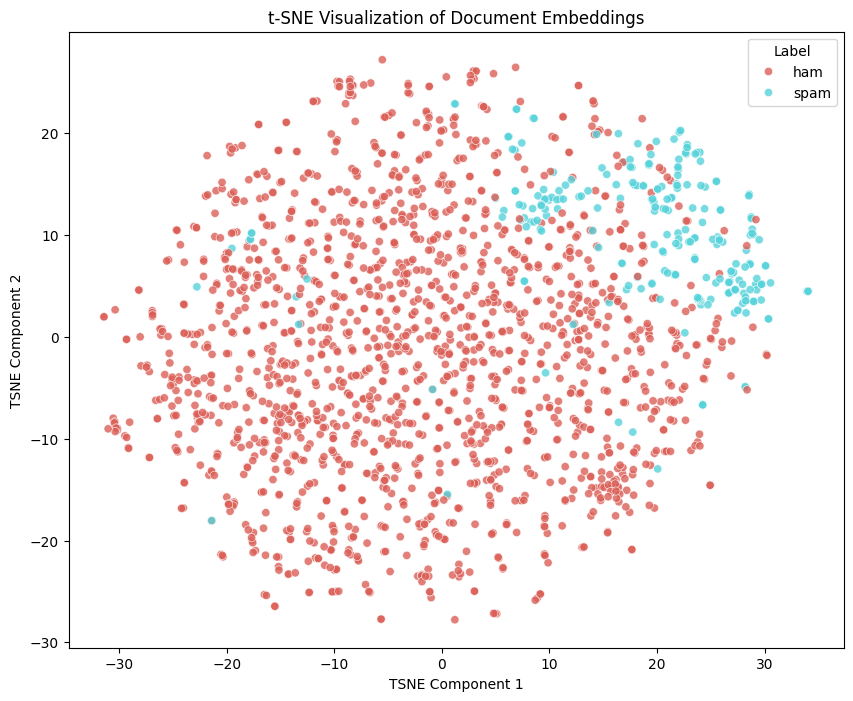


--- Visualizing Topic Proportions with Heatmap (Dummy Data) ---


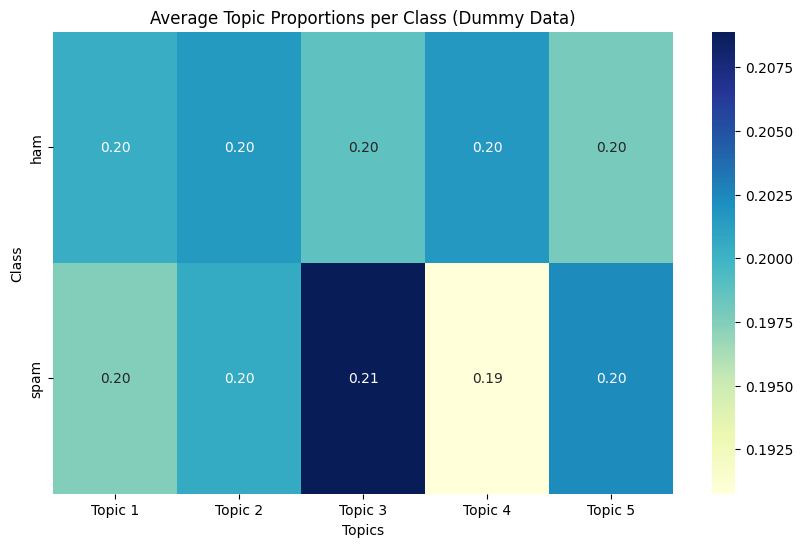


--- Visualizing Confusion Matrix with Heatmap ---


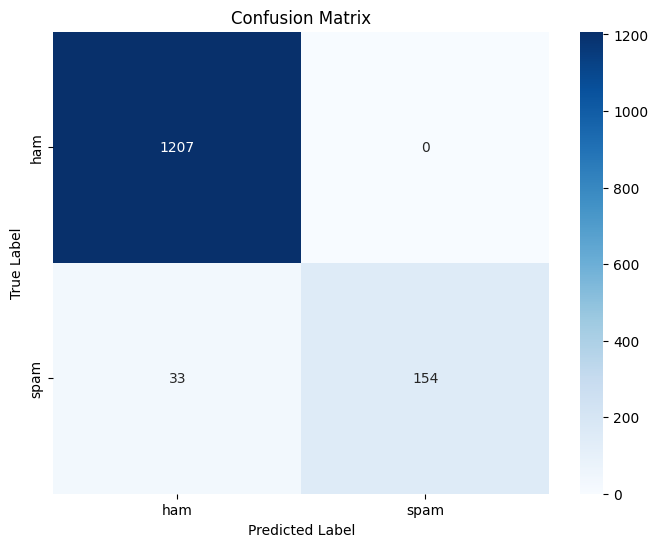


--- Visualizing Hierarchical Clustering Dendrogram (Subset) ---
Using 50 samples for Dendrogram visualization.


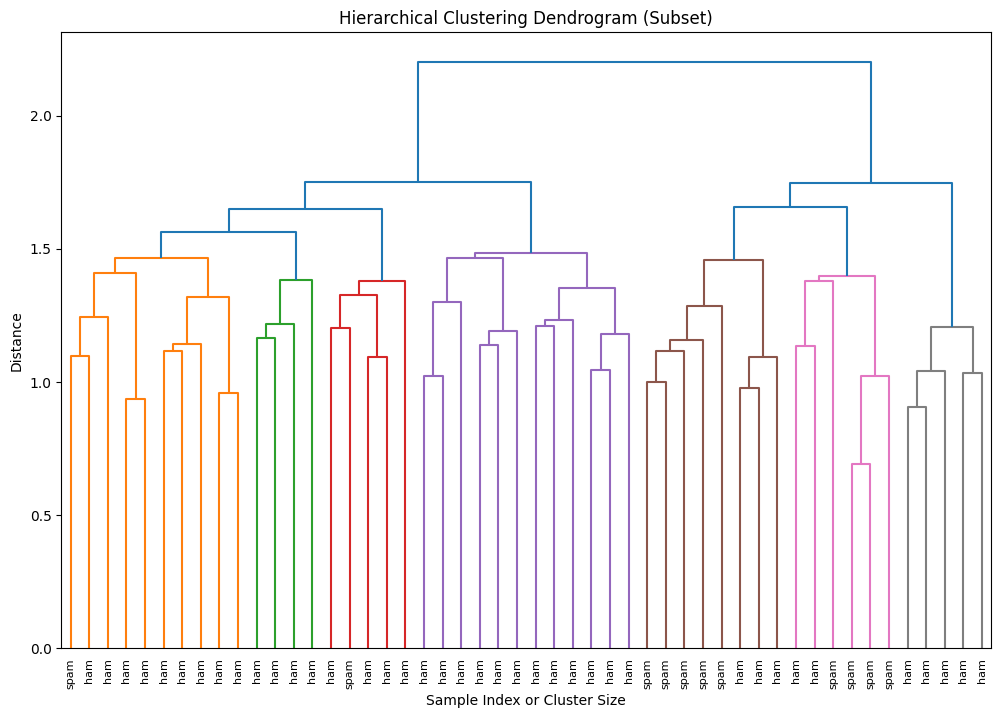

In [64]:
# prompt: Create advanced visualizations of t-SNE of embeddings, heatmap of topic proportions and confusion matrix

import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# --- t-SNE Visualization of Document Embeddings ---

print("\n--- Visualizing Document Embeddings with t-SNE ---")

if 'document_embeddings' in locals() and document_embeddings is not None and document_embeddings.shape[0] > 0:
    # t-SNE is computationally expensive and works best on a subset of data
    # if your dataset is large. Let's use a subset for demonstration.
    num_samples_tsne = min(2000, document_embeddings.shape[0]) # Limit to 2000 samples or less
    print(f"Using {num_samples_tsne} samples for t-SNE visualization.")

    # Select a random subset of embeddings and corresponding labels
    if document_embeddings.shape[0] > num_samples_tsne:
        indices = np.random.choice(document_embeddings.shape[0], num_samples_tsne, replace=False)
        subset_embeddings = document_embeddings[indices]
        subset_labels = df['Class'].iloc[indices].tolist() # Assuming 'Class' is your label column
    else:
        subset_embeddings = document_embeddings
        subset_labels = df['Class'].tolist() # Assuming 'Class' is your label column

    print(f"Shape of subset embeddings for t-SNE: {subset_embeddings.shape}")

    # Initialize t-SNE
    # n_components: The dimension of the embedded space (usually 2 or 3)
    # random_state: For reproducibility
    # perplexity: Controls the balance between local and global aspects of the data (tune between 5 and 50)
    # n_iter: Number of iterations for the optimization
    # learning_rate: Affects how the optimization converges
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)

    # Fit and transform the subset embeddings
    print("Applying t-SNE... This may take a few minutes.")
    tsne_results = tsne.fit_transform(subset_embeddings)
    print("t-SNE completed.")

    # Create a DataFrame for plotting
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE-Component-1', 'TSNE-Component-2'])
    tsne_df['Label'] = subset_labels

    # Visualize the t-SNE results
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="TSNE-Component-1", y="TSNE-Component-2",
        hue="Label",
        palette=sns.color_palette("hls", len(np.unique(subset_labels))), # Adjust palette based on number of labels
        data=tsne_df,
        legend="full",
        alpha=0.8
    )
    plt.title('t-SNE Visualization of Document Embeddings')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

else:
    print("\nt-SNE visualization skipped: Document embeddings not available or empty.")


# --- Heatmap of Topic Proportions (Requires Topic Modeling - e.g., LDA) ---
# This part requires that you have performed topic modeling (e.g., Latent Dirichlet Allocation - LDA)
# and have obtained a matrix where each row is a document and each column represents a topic,
# with values indicating the proportion of that topic in the document.

# Since LDA was not explicitly run in the preceding code, we will create a dummy topic proportion matrix
# to demonstrate the heatmap visualization.
# Replace this dummy data generation with your actual topic modeling results if available.

print("\n--- Visualizing Topic Proportions with Heatmap (Dummy Data) ---")

# Dummy data generation: Assume 5 topics
num_documents = df.shape[0]
num_topics = 5 # Example number of topics

# Generate random topic proportions for each document (summing to 1)
dummy_topic_proportions = np.random.rand(num_documents, num_topics)
dummy_topic_proportions = dummy_topic_proportions / dummy_topic_proportions.sum(axis=1, keepdims=True)

# Convert to DataFrame
topic_proportion_df = pd.DataFrame(dummy_topic_proportions, columns=[f'Topic {i+1}' for i in range(num_topics)])

# Add the original labels for grouping (optional)
if 'Class' in df.columns:
    topic_proportion_df['Label'] = df['Class'].values

# You might want to visualize average topic proportions per class
if 'Label' in topic_proportion_df.columns:
    avg_topic_proportions_by_label = topic_proportion_df.groupby('Label').mean()

    plt.figure(figsize=(10, 6))
    sns.heatmap(avg_topic_proportions_by_label, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title('Average Topic Proportions per Class (Dummy Data)')
    plt.xlabel('Topics')
    plt.ylabel('Class')
    plt.show()

else:
    print("Cannot group topic proportions by label: 'Class' column not found.")

# You could also visualize the topic proportions for individual documents,
# but this is only feasible for a small number of documents.

# --- Confusion Matrix Heatmap ---
# This was already done in the previous code cell, but we will repeat it here
# for completeness of the requested visualizations.

print("\n--- Visualizing Confusion Matrix with Heatmap ---")

# Ensure y_test and y_pred from the classification step are available
if 'y_test' in locals() and 'y_pred' in locals():
    cm = confusion_matrix(y_test, y_pred)
    class_names = np.unique(y_test) # Get unique class names from the test set

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print("\nConfusion Matrix visualization skipped: Classification results (y_test, y_pred) not available.")

# --- Optional: Hierarchical Clustering Dendrogram (for a small subset) ---
# Dendrograms visualize the results of hierarchical clustering.
# This is only feasible for a very small number of data points due to computational complexity.

print("\n--- Visualizing Hierarchical Clustering Dendrogram (Subset) ---")

if 'document_embeddings' in locals() and document_embeddings is not None and document_embeddings.shape[0] > 0:
    num_samples_dendrogram = min(50, document_embeddings.shape[0]) # Limit to 50 samples
    print(f"Using {num_samples_dendrogram} samples for Dendrogram visualization.")

    if document_embeddings.shape[0] > num_samples_dendrogram:
        indices_dendrogram = np.random.choice(document_embeddings.shape[0], num_samples_dendrogram, replace=False)
        subset_embeddings_dendrogram = document_embeddings[indices_dendrogram]
        subset_labels_dendrogram = df['Class'].iloc[indices_dendrogram].tolist()
    else:
         subset_embeddings_dendrogram = document_embeddings
         subset_labels_dendrogram = df['Class'].tolist()


    # Perform hierarchical clustering
    # 'ward' linkage minimizes the variance of the clusters being merged
    linked = linkage(subset_embeddings_dendrogram, 'ward')

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(linked,
               orientation='top',
               labels=subset_labels_dendrogram, # Use labels to see how clusters align with true classes
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title('Hierarchical Clustering Dendrogram (Subset)')
    plt.xlabel('Sample Index or Cluster Size')
    plt.ylabel('Distance')
    plt.show()

else:
    print("\nDendrogram visualization skipped: Document embeddings not available or empty.")
